# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:

#URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

   
cloudiness = [] 
country = []     
date = []         
humidity = []     
lat = []       
lng = []         
max_temp = []     
wind_speed = []  
city_list = []


counter = 1
nb_tries = 10
# Loop through the list of cities and perform a request for data on each
for city in cities:
    city_url = query_url + city.replace(' ','+') 
    response = requests.get(city_url)
    print(f'Processing Record {counter} | {city}')
    #print(city_url)
    
    try:
        response.raise_for_status()
        data = response.json()
        #print(data) # to check the key structure
        time.sleep(1)
        city_list.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])      
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])    
        wind_speed.append(data['wind']['speed'])
    except requests.exceptions.HTTPError as e:
        print('City not found. skipping...')
        pass

Processing Record 1 | hermanus
Processing Record 1 | port alfred
Processing Record 1 | bluff
Processing Record 1 | dwarka
Processing Record 1 | qaanaaq
Processing Record 1 | aswan
Processing Record 1 | vaitupu
City not found. skipping...
Processing Record 1 | cockburn town
Processing Record 1 | barrow
Processing Record 1 | rio gallegos
Processing Record 1 | rikitea
Processing Record 1 | kiev
Processing Record 1 | saldanha
Processing Record 1 | palora
Processing Record 1 | punta arenas
Processing Record 1 | gedo
Processing Record 1 | panaba
Processing Record 1 | vaini
Processing Record 1 | lebu
Processing Record 1 | tuktoyaktuk
Processing Record 1 | qaqortoq
Processing Record 1 | mount isa
Processing Record 1 | hobart
Processing Record 1 | nuuk
Processing Record 1 | ushuaia
Processing Record 1 | tasiilaq
Processing Record 1 | sokolo
Processing Record 1 | khatanga
Processing Record 1 | barentsburg
City not found. skipping...
Processing Record 1 | ngukurr
City not found. skipping...
Proce

Processing Record 1 | hualmay
Processing Record 1 | pemangkat
Processing Record 1 | lagoa
Processing Record 1 | lerwick
Processing Record 1 | hami
Processing Record 1 | marienburg
Processing Record 1 | sur
Processing Record 1 | solnechnyy
Processing Record 1 | liniere
City not found. skipping...
Processing Record 1 | upernavik
Processing Record 1 | katsuura
Processing Record 1 | monatele
City not found. skipping...
Processing Record 1 | port hardy
Processing Record 1 | ponta do sol
Processing Record 1 | campechuela
Processing Record 1 | leningradskiy
Processing Record 1 | mount gambier
Processing Record 1 | bilma
Processing Record 1 | adrar
Processing Record 1 | worcester
Processing Record 1 | plettenberg bay
Processing Record 1 | tenenkou
Processing Record 1 | labuhan
Processing Record 1 | saint george
Processing Record 1 | beidao
Processing Record 1 | seaca de camp
Processing Record 1 | alta floresta
Processing Record 1 | san lorenzo
Processing Record 1 | eyl
Processing Record 1 | hi

Processing Record 1 | toliary
City not found. skipping...
Processing Record 1 | san vicente
Processing Record 1 | olinda
Processing Record 1 | mokhsogollokh
Processing Record 1 | prijepolje
Processing Record 1 | northam
Processing Record 1 | wawa
Processing Record 1 | gambela
Processing Record 1 | bambanglipuro
Processing Record 1 | quatre cocos
Processing Record 1 | tranas
Processing Record 1 | jijiga
Processing Record 1 | pirovskoye
Processing Record 1 | punta alta
Processing Record 1 | mareeba
Processing Record 1 | wewak
Processing Record 1 | santa barbara
Processing Record 1 | seoul
Processing Record 1 | whitianga
Processing Record 1 | pangnirtung
Processing Record 1 | gushikawa
Processing Record 1 | san luis
Processing Record 1 | payakumbuh
Processing Record 1 | samarai
Processing Record 1 | dargaville
Processing Record 1 | sabha
Processing Record 1 | mayo
Processing Record 1 | choctaw
Processing Record 1 | osterhofen
Processing Record 1 | luanda
Processing Record 1 | camacupa
Pro

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:

# Convert raw data to DataFrame
cities_df = pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

# Export the city data into a .csv
cities_df.to_csv(r'/Users/calvincrouch/Desktop/python-api-challenge/WeatherPy/cities.csv', header=True)



cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,16.67,86,100,0.39,ZA,1619373128
1,port alfred,-33.5906,26.8910,21.47,71,98,6.88,ZA,1619373427
2,bluff,-46.6000,168.3333,5.56,84,78,2.68,NZ,1619373110
3,dwarka,22.2394,68.9678,27.96,78,0,7.21,IN,1619373431
4,qaanaaq,77.4840,-69.3632,-0.15,73,80,1.61,GL,1619373342


In [15]:
#cities_df.describe()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,4.750000e+02
mean,19.403374,21.962114,16.417853,67.734737,58.185263,3.700674,1.619374e+09
std,33.994719,93.035287,11.915117,22.646177,36.117124,2.434209,2.958224e+02
min,-54.800000,-175.200000,-20.110000,4.000000,0.000000,0.150000,1.619373e+09
25%,-8.289150,-59.471500,8.330000,54.500000,20.000000,1.825000,1.619373e+09
50%,21.283300,24.662200,18.260000,72.000000,75.000000,3.130000,1.619374e+09
75%,49.172350,110.038650,26.000000,86.000000,90.000000,5.140000,1.619374e+09
max,78.218600,179.316700,40.310000,100.000000,100.000000,15.430000,1.619374e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

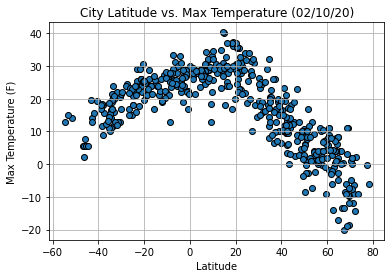

In [19]:
# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/10/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

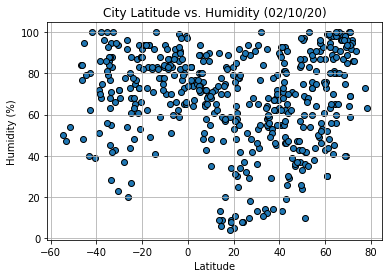

In [20]:

# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

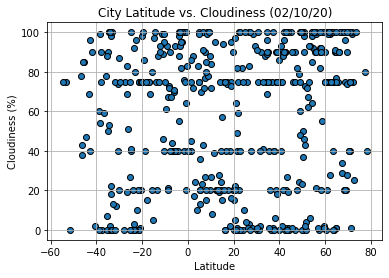

In [22]:
 
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/10/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

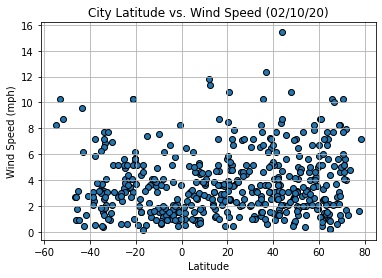

In [23]:

# Build a scatter plot 
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/10/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [24]:
# Separate DataFrame into Northern and Southern Hemisphere
north_df = cities_df.loc[(cities_df["Lat"] >= 0)]

south_df = cities_df.loc[(cities_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.766346614604286


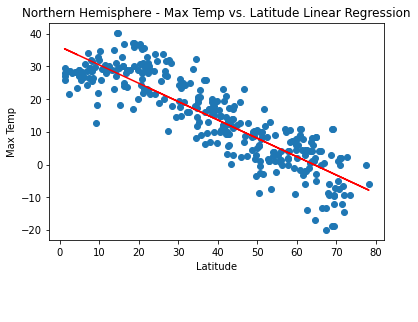

In [31]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-45),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"r-squared: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsTemperatureNRegress.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5417997391806987


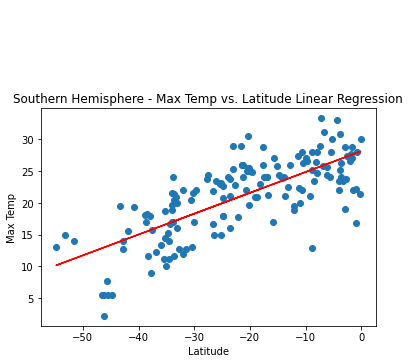

In [32]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,49),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsTemperatureSRegress.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04446482550884087


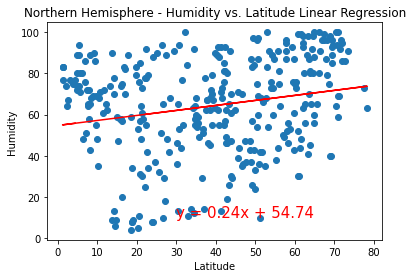

In [33]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsHumidityNRegress.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.050470107607119355


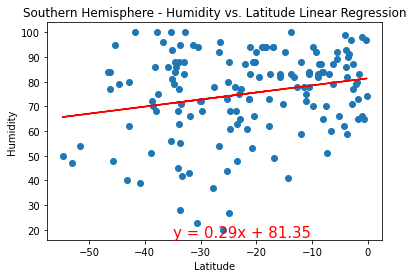

In [34]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,17),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsHumiditySRegress.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028607224180659193


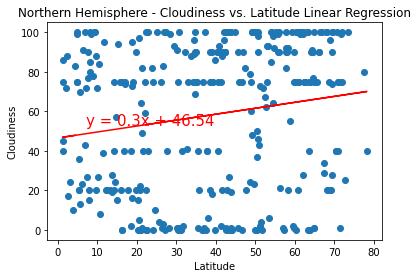

In [35]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,53),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsCloudinessNRegress.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0529242066432074


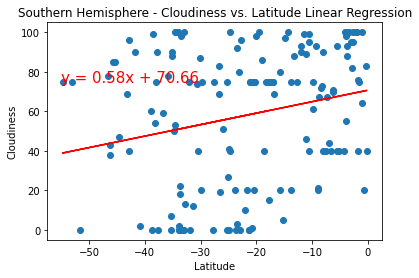

In [36]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsCloudinessSRegress.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00901252836799041


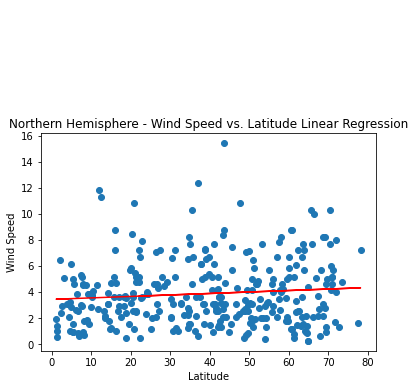

In [37]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsWindSpeedNRegress.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05956665995815801


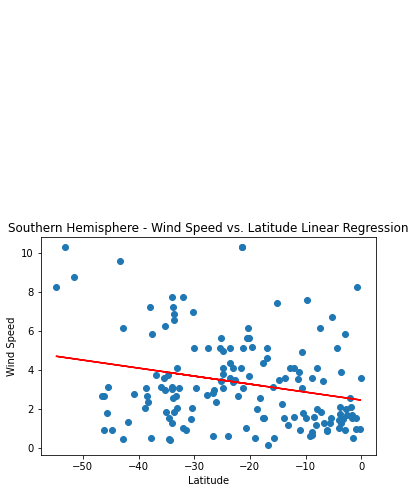

In [38]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,22),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("LatitudeVsWindSpeedSRegress.png")

plt.show()